In [9]:
# Forked from: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Colors
c_foreg = '#001439'
c_backg = '#0A1E42'
c_mark = '#FF1616'
c_m1 = '#FFD700'
c_labels = '#fff'

# Styling/Charts
print(matplotlib.matplotlib_fname())
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['font.family'] = 'monospace'
matplotlib.rcParams['font.monospace'] = 'DejaVu Sans Mono'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.weight'] = 800
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['axes.facecolor'] = c_foreg
matplotlib.rcParams['axes.edgecolor'] = c_backg 
matplotlib.rcParams['figure.facecolor'] = c_backg
matplotlib.rcParams['figure.edgecolor'] = c_backg
matplotlib.rcParams['xtick.color'] = c_m1
matplotlib.rcParams['ytick.color'] = c_m1
matplotlib.rcParams['text.color'] = c_m1
matplotlib.rcParams['axes.titlecolor'] = c_labels 
matplotlib.rcParams['axes.labelcolor'] = c_labels

/Users/gcim/Documents/github/.myvenv/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


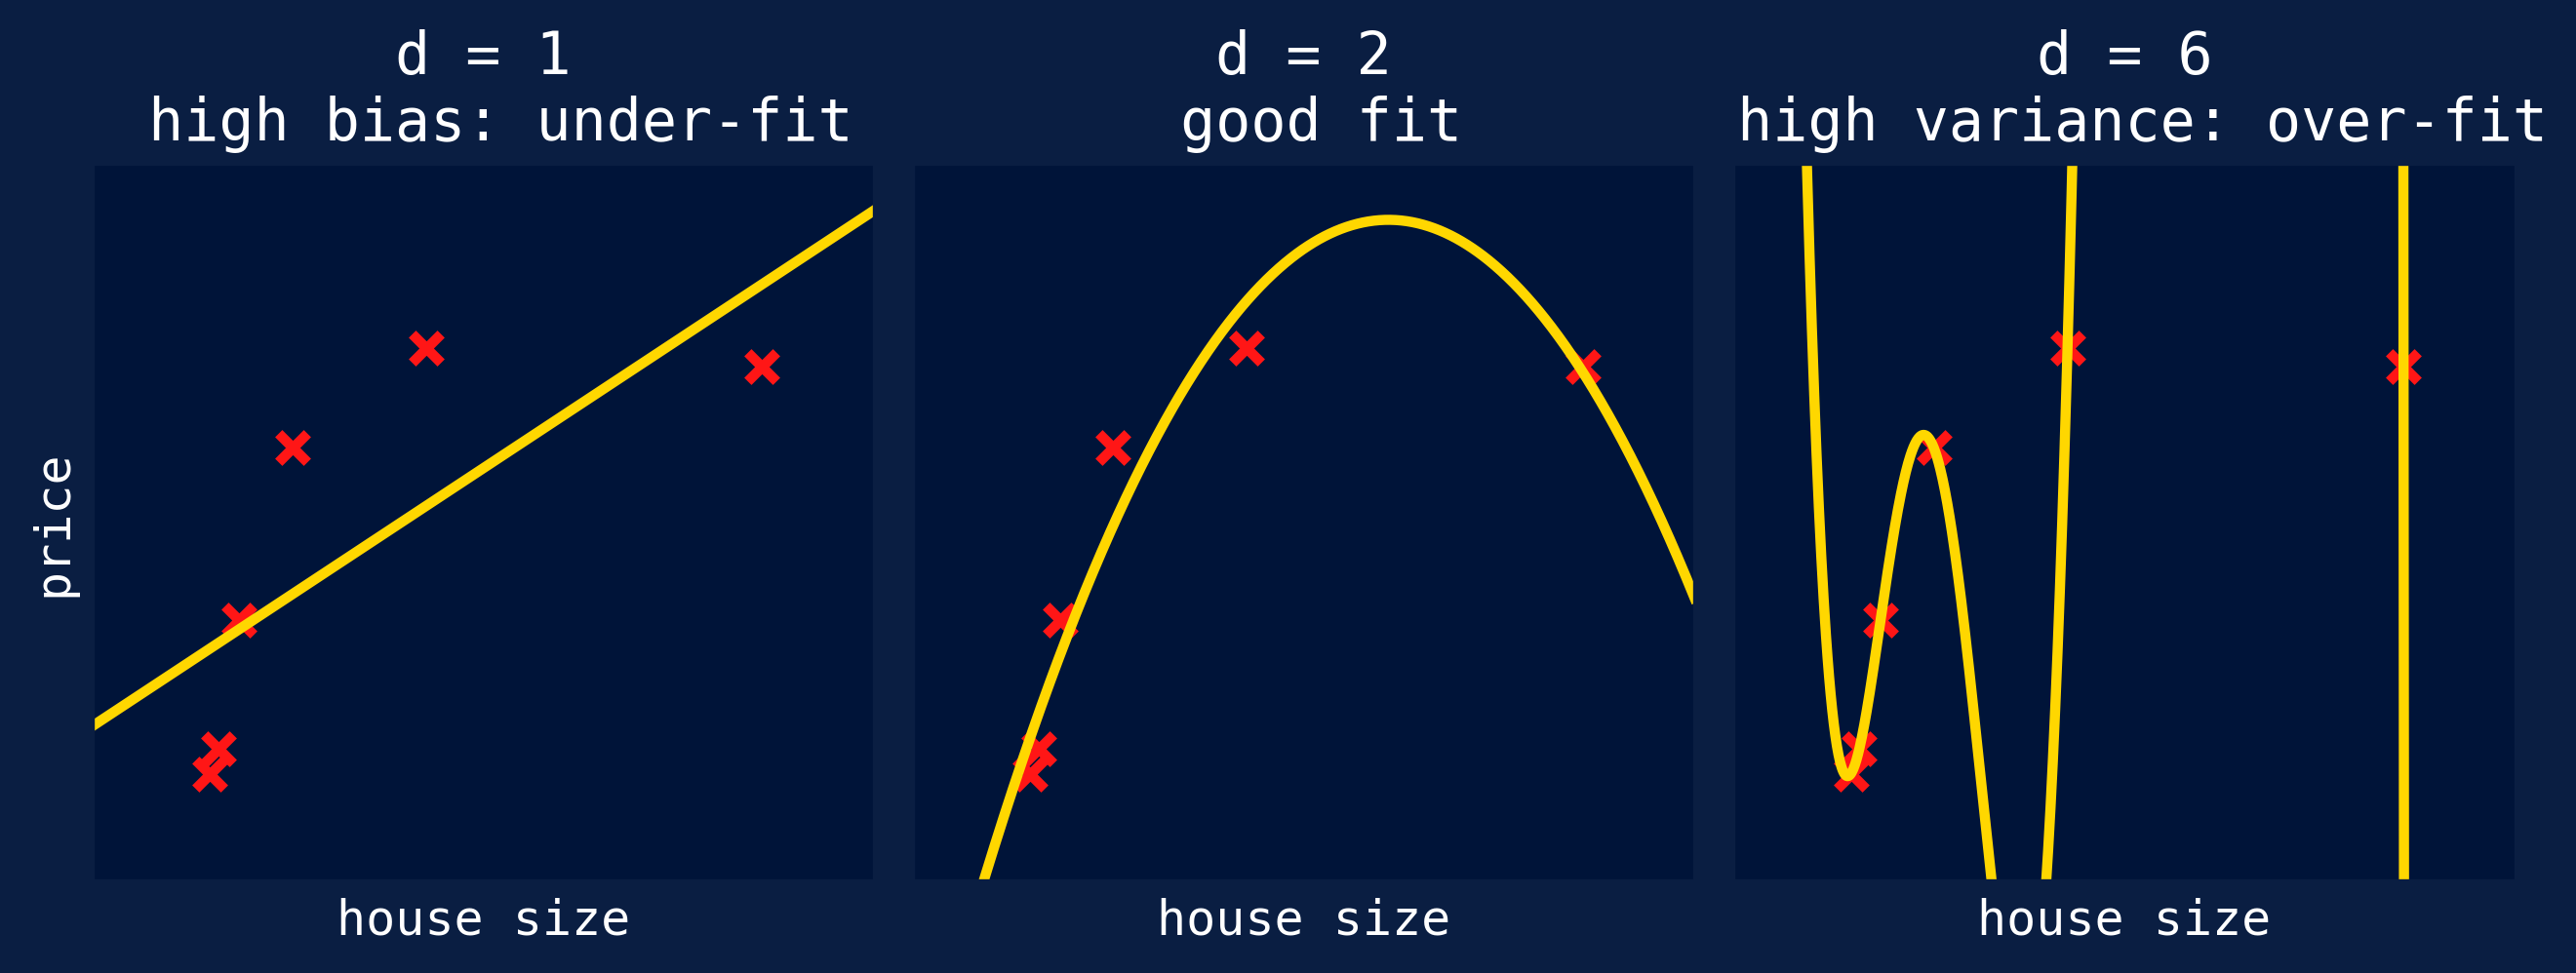

In [12]:
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

n_samples = 6
np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)
x_test = np.linspace(-0.2, 1.2, 1000)
titles = ['d = 1\n high bias: under-fit','d = 2\n good fit', 'd = 6\n high variance: over-fit']
degrees = [1, 2, 6]
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c = c_mark, s=50)
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), c = c_m1)
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')
    ax.set_title(titles[i])
plt.savefig('img_BiasVariance'+'.png', bbox_inches='tight', pad_inches=0.5)